# 제 8 장 __인공신경망의 이해와 활용__
___

## __사전설정__
---

(1) 저장소 데이터 가져오기

In [ ]:
!rm -rf /content/BizDataAnalysis/

In [1]:
!git clone https://github.com/BizStat/BizDataAnalysis.git

Cloning into 'BizDataAnalysis'...
remote: Enumerating objects: 208, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 208 (delta 9), reused 29 (delta 4), pack-reused 174
Receiving objects: 100% (208/208), 124.57 MiB | 11.69 MiB/s, done.
Resolving deltas: 100% (62/62), done.
Updating files: 100% (51/51), done.



(2) matplotlib 환경에서 한글 사용

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -f -v
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,699 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and dire

런타임 메뉴에서 '세션 다시 시작' 후 다음의 명령문 실행

In [1]:
from matplotlib import rc
rc('font', family='NanumGothicCoding')
rc('axes', unicode_minus=False)

(3) 구글 드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

___

## 8.3 __신경망 모형의 활용__

### (1) Convolution Neural Network

* MNIST 데이터 가져오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!unzip /content/BizDataAnalysis/DATA/mnist.zip # /content 폴더에 풀림
mnist = pd.read_table('/content/mnist.csv',header=None,sep=',')

Archive:  /content/BizDataAnalysis/DATA/mnist.zip
  inflating: mnist.csv               


* 데이터 분리 및 변환

In [4]:
X = mnist.iloc[:,1:]  # 28 x 29 픽셀 이미지
y = mnist.iloc[:,[0]] # 해당 이미지가 나타내는 숫자

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=60000,shuffle=False)

* CNN 적용을 위해 데이터 변환

In [6]:
X_train = np.array(X_train).reshape((60000, 28 ,28, 1))
X_test = np.array(X_test).reshape((10000, 28 ,28, 1))

* CNN 모형 설정

In [7]:
from tensorflow.keras import layers, models

mnist_cnn_mod = models.Sequential([
    layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                  padding='same', activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Conv2D(64, kernel_size=(2, 2), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [8]:
mnist_cnn_mod.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [9]:
mnist_cnn_mod.compile(optimizer='Adam', loss = 'sparse_categorical_crossentropy', metrics=['acc'])

* CNN 모형 학습 및 평가

In [10]:
history = mnist_cnn_mod.fit(
  X_train, y_train,
  validation_data=(X_test,y_test),
  epochs=10, batch_size=1000,
  verbose=1
)

Epoch 1/10
60/60 [==============================] - 83s 1s/step - loss: 8.3532 - acc: 0.7300 - val_loss: 0.1521 - val_acc: 0.9583
Epoch 2/10
60/60 [==============================] - 82s 1s/step - loss: 0.1329 - acc: 0.9588 - val_loss: 0.0709 - val_acc: 0.9799
Epoch 3/10
60/60 [==============================] - 81s 1s/step - loss: 0.0765 - acc: 0.9747 - val_loss: 0.0537 - val_acc: 0.9839
Epoch 4/10
60/60 [==============================] - 85s 1s/step - loss: 0.0517 - acc: 0.9833 - val_loss: 0.0488 - val_acc: 0.9853
Epoch 5/10
60/60 [==============================] - 83s 1s/step - loss: 0.0415 - acc: 0.9866 - val_loss: 0.0435 - val_acc: 0.9883
Epoch 6/10
60/60 [==============================] - 82s 1s/step - loss: 0.0329 - acc: 0.9895 - val_loss: 0.0416 - val_acc: 0.9878
Epoch 7/10
60/60 [==============================] - 83s 1s/step - loss: 0.0261 - acc: 0.9910 - val_loss: 0.0381 - val_acc: 0.9899
Epoch 8/10
60/60 [==============================] - 82s 1s/step - loss: 0.0209 - acc: 0.99

In [11]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,acc,val_loss,val_acc,epoch
0,8.353172,0.729950,0.152091,0.9583,0
1,0.132881,0.958767,0.070865,0.9799,1
2,0.076517,0.974750,0.053703,0.9839,2
3,0.051681,0.983350,0.048818,0.9853,3
4,0.041486,0.986567,0.043539,0.9883,4
5,0.032922,0.989483,0.041568,0.9878,5
6,0.026140,0.991033,0.038102,0.9899,6
7,0.020915,0.993167,0.036493,0.9896,7
8,0.018542,0.993650,0.039187,0.9891,8
9,0.014583,0.995300,0.038536,0.9896,9


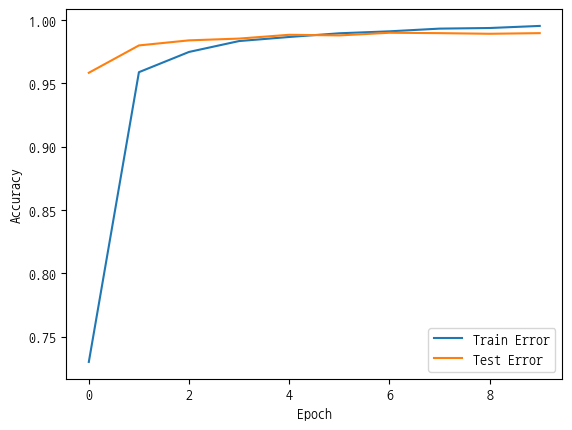

In [12]:
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(hist['epoch'], hist['acc'],label='Train Error')
plt.plot(hist['epoch'], hist['val_acc'],label = 'Test Error')
plt.legend()
plt.show()

In [13]:
score = mnist_cnn_mod.evaluate(X_test, y_test)
print(f'Test Loss : {score[0]}')
print(f'Test Accuracy  : {score[1]}')

313/313 [==============================] - 7s 21ms/step - loss: 0.0385 - acc: 0.9896
Test Loss : 0.03853647783398628
Test Accuracy  : 0.9896000027656555


* 모형의 분류 결과 살펴보기

In [14]:
pred_result = mnist_cnn_mod.predict(X_test)
pred_labels = np.argmax(pred_result,  axis=1)
y_test_pred = pd.DataFrame(pred_labels)

313/313 [==============================] - 7s 21ms/step


In [32]:
y_test.reset_index(inplace=True)

In [33]:
result = pd.concat([y_test,y_test_pred],axis=1,ignore_index=True)

In [36]:
pd.crosstab(index=result.iloc[:,2],columns=result.iloc[:,3],normalize='index')

3,0,1,2,3,4,5,6,7,8,9
2,,,,,,,,,,
0,0.995964,0.000000,0.000000,0.000000,0.000000,0.001009,0.000000,0.000000,0.001009,0.002018
1,0.000000,0.991541,0.000940,0.000940,0.000000,0.000940,0.002820,0.000940,0.001880,0.000000
2,0.000000,0.002020,0.986869,0.002020,0.000000,0.000000,0.001010,0.006061,0.001010,0.001010
3,0.000000,0.000000,0.000971,0.985437,0.000000,0.005825,0.000000,0.000971,0.004854,0.001942
4,0.000000,0.003052,0.000000,0.000000,0.991862,0.000000,0.000000,0.001017,0.000000,0.004069
5,0.000000,0.000000,0.001093,0.003279,0.001093,0.984699,0.006557,0.000000,0.002186,0.001093
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.001034,0.996898,0.000000,0.002068,0.000000
7,0.000000,0.000000,0.000917,0.000000,0.001835,0.000000,0.000000,0.994495,0.000000,0.002752
8,0.000000,0.000000,0.000991,0.000991,0.002973,0.002973,0.000991,0.000991,0.989098,0.000991


---